# Introduction to neural networks classification with TensorFlow
A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [202]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [203]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


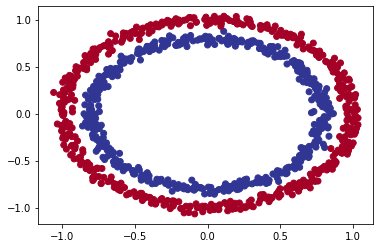

In [204]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [205]:
X.shape, y.shape

((1000, 2), (1000,))

In [206]:
len(X)

1000

In [207]:
import tensorflow as tf

model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer((1000)))
# model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history =model.fit(X, y, batch_size=1000, epochs=170)

Epoch 1/170
1/1 [==============================] - 0s 444ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 3/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5240
Epoch 4/170
1/1 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5000
Epoch 5/170
1/1 [==============================] - 0s 10ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 6/170
1/1 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5050
Epoch 7/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5080
Epoch 8/170
1/1 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5080
Epoch 9/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5190
Epoch 10/170
1/1 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5210
Epoch 11/170
1/1 [========

In [208]:
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.5960


[0.6270714998245239, 0.5960000157356262]

In [209]:
import numpy as np


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = (
        np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape((xx.shape))


    plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing binary classification


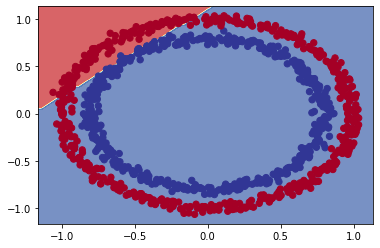

In [210]:
plot_decision_boundary(model, X, y)